In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

# GDP data reading and cleaning

In [3]:
gdp_path = '../../data/expenditure/expenditure_gdp.csv'
gdp = pd.read_csv(gdp_path)

C:\Users\sidhu\AppData\Local\Temp/ipykernel_6408/3962260804.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  gdp = pd.read_csv(gdp_path)


In [4]:
gdp['REF_DATE'] = pd.to_datetime(gdp['REF_DATE'])
gdp.head(2)

,REF_DATE,GEO,DGUID,Prices,Seasonal adjustment,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961-01-01,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Final consumption expenditure,Dollars,81,millions,6,v62305723,1.1.1.1,273818.0,NaN,NaN,NaN,0
1,1961-01-01,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Household final consumption expenditure,Dollars,81,millions,6,v62305724,1.1.1.2,182300.0,NaN,NaN,NaN,0


### Extracted only required columns and rows

In [5]:
# filter data
gdp_subset = gdp[(gdp['REF_DATE'] >= '2004-01-01') &
                (gdp['Prices'] == 'Chained (2012) dollars') & 
                (gdp['Estimates'] == 'Gross domestic product at market prices') &
                 (gdp['UOM'] == 'Dollars')]
gdpts = gdp_subset[['REF_DATE', 'VALUE']]

# rename columns
gdpts = gdpts.rename(columns = {'REF_DATE': 'Date', 'VALUE': 'GDP'})

In [6]:
gdpts.head()

,Date,GDP
31505,2004-01-01,1566737.0
31688,2004-04-01,1585347.0
31871,2004-07-01,1604061.0
32054,2004-10-01,1615585.0
32237,2005-01-01,1621176.0


### Time series of GDP

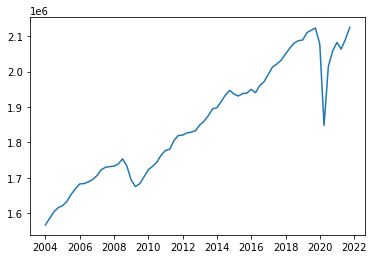

In [7]:
gdp_data = gdpts.copy()
gdp_data.index = gdpts['Date']
plt.plot(gdp_data['GDP'])
plt.show()

# Get predictors from Google Trends

In [128]:
# get caegories from csv file
key_path = '../../data/keywords_data/GDP.csv'
key_data = pd.read_csv(key_path)
cat_lst = key_data['CatNo']
key_data.head()

,CatNo,Category,Keywords,keywordCat,keywordCatNo
0,569,Events & Listings,Economic crisis,Economics,520
1,23,Performing Arts,Crisis,Economics,520
2,47,Autos & Vehicles,Recession,Economics,520
3,815,Vehicle Brands,Financial crisis,Economics,520
4,170,Vehicle Licensing & Registration,Krach,Economics,520


In [129]:
pytrends = TrendReq(hl='en-US', backoff_factor=0.1)


def get_trends(keyword=[''], category='0', related_queries=5, related_topics=5):
    """ function to get the google trend for desired keyword and category"""
    kw_list = keyword
    cat = category
    timeframe = '2004-01-01 2022-01-01'
    geo = 'CA'
    gprop = ''

    pytrends.build_payload(kw_list, cat, timeframe, geo, gprop)
    # get time series
    data = pytrends.interest_over_time()
    
    # get related queries
    if related_queries > 0:
        queries = pytrends.related_queries()
        queries_lst = list(queries['']['top']['query'].values[0:related_queries])
    
    # get related topics
    if related_topics > 0:
        topics = pytrends.related_topics()
        topics_lst = list(topics['']['top']['topic_title'].values[0:related_topics])
    return data, queries_lst, topics_lst

In [130]:
queries_dict = {}
topics_dict = {}

for i, category in enumerate(cat_lst):
    category = str(category)
    data, queries, topics = get_trends(category=category, related_queries=2, related_topics=2)
    queries_dict[category] = queries
    topics_dict[category] = topics


In [135]:
queries_dict

{'569': ['cineplex', 'cinema'],
 '23': ['dance', 'theatre'],
 '47': ['honda', 'ford'],
 '815': ['honda', 'ford'],
 '170': ['license', 'driving'],
 '249': ['blue cross', 'desjardins'],
 '71': ['pizza pizza', 'pizza'],
 '276': ['restaurant', 'restaurants'],
 '634': ['clinic', 'dr'],
 '250': ['hospital', 'hopital'],
 '168': ['fire', 'emergency'],
 '437': ['depression', 'anxiety'],
 '11': ['home depot', 'ikea'],
 '29': ['mls', 'real estate'],
 '96': ['remax', 'real real'],
 '18': ['kijiji', 'walmart'],
 '67': ['hotel', 'air canada'],
 '179': ['hotel', 'hotels'],
 '5': ['google', 'apple'],
 '68': ['shoes', 'boots'],
 '78': ['xbox', 'videotron'],
 '696': ['or', 'bijoux'],
 '329': ['acces d', 'accesd'],
 '95': ['staples', 'desk'],
 '423': ['bankruptcy', 'hollywoodpq'],
 '279': ['credit', 'mortgage'],
 '1160': ['business', 'pret'],
 '813': ['student', 'tuition'],
 '466': ['mortgage', 'calculator'],
 '468': ['lease', 'calculator'],
 '46': ['farm', 'plant'],
 '750': ['forest', 'forestry'],
 '747

{'569': ['Cineplex Entertainment',
  'Film',
  'Movie theater',
  'Toronto',
  'Theater']}

### Plot trends

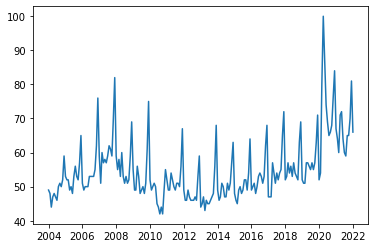

In [11]:
trend_data = data.copy()
plt.plot(trend_data[''])
plt.show()

In [12]:
kw_list = ['']
cat = '22'
timeframe = '2004-01-01 2022-01-01'
geo = 'CA'
gprop = ''

pytrends.build_payload(kw_list, cat, timeframe, geo, gprop)
data = pytrends.interest_over_time()

In [110]:
pytrends.suggestions("Economic crisis")

[{'mid': '/g/1211cg58', 'title': 'economic crisis', 'type': 'Topic'},
 {'mid': '/g/11q2xlm4ss',
  'title': '2019–present Sri Lankan economic crisis',
  'type': 'Event'},
 {'mid': '/m/080pqzt',
  'title': '1998–1999 Ecuador economic crisis',
  'type': 'Topic'},
 {'mid': '/g/11bwdr23n9',
  'title': '2013–present economic crisis in Venezuela',
  'type': 'Topic'},
 {'mid': '/m/05p85kd',
  'title': '1991 Indian economic crisis',
  'type': 'Topic'}]